# Linear Regression from scratch in Python.

Linear Regression is a Machine learning algorithm in which we create a linear relationship between the data, by simply finding a best fit line which can give out result. 

Let's implement it from scratch.

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import copy

## Boston Housing Dataset

By the looks of it it contains a lot of parameteres to define proces of houses across Boston.

Let's load the dataset and plot RM vs MEDV (No. of ROOMS vs Median Hourse Value).

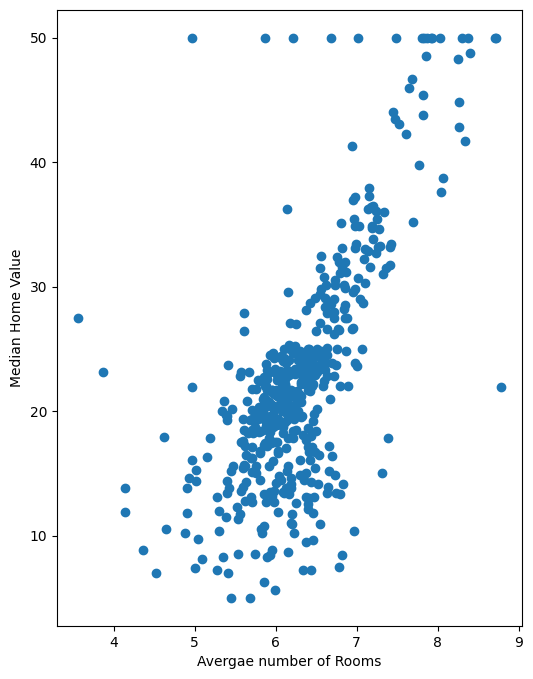

In [92]:
data = pd.read_csv('HousingData.csv')

data = data.fillna(data.mean())

x = data.drop(columns='MEDV').to_numpy()
y = data['MEDV'].to_numpy()

shuffled_indices = np.random.permutation(x.shape[0])
n_test_samples = int(x.shape[0] * 0.25)

test_indices = shuffled_indices[:n_test_samples]
train_indices = shuffled_indices[n_test_samples:]

x_train = x[train_indices]
y_train = y[train_indices]
x_test = x[test_indices]
y_test = y[test_indices]

plt.figure(figsize=(6, 8))
plt.scatter(data['RM'], data['MEDV'])
plt.xlabel("Avergae number of Rooms")
plt.ylabel("Median Home Value")
plt.show()

## Feature Scaling

In order to make learning more effective we'll use Z-score Normalization across our data to ensure that all the values are in similar range. This will help in converging the values.

In [93]:
def zscore_normalize(x):
    mean = np.mean(x, axis=0)
    sigma = np.std(x, axis=0)
    x_norm = (x - mean) / sigma

    return x_norm, mean, sigma

x_train = zscore_normalize(x_train)[0]
x_test = zscore_normalize(x_test)[0]

## Cost Function

Let's define the mean squared error loss function for our program.

Since we'll use linear regression, we assume function to be in some 

$ f(x) = w_{0}x_{0} + w_{1}x_{1} + . . .  + b $

In [94]:
def mean_squared_loss(x, y, w, b):

    m = x.shape[0]

    square_sum = 0
    for i in range(m):
        square_sum += ((np.dot(x[i], w) + b) - y[i])**2
    
    mean_error = square_sum/(2*m)
    return mean_error

print(mean_squared_loss(x_train, y_train, np.zeros(x_train.shape[1]), 0))

296.6427894736844


## Gradient Descent

We'll implement gradient descent to find the most optimal value of w and b

compute_gradient - Calculate derivatuves (gradients)
gradient_descent - Compute the optimal values of w and b

In [95]:
def compute_gradient(x, y, w, b):
    m, n = x.shape
    dj_dw = np.zeros((n,))
    dj_db = 0

    for i in range(m):
        err = (np.dot(x[i], w) + b) - y[i]
        for j in range(n):
            dj_dw[j] += err * x[i, j]
        dj_db += err 
    
    dj_dw = dj_dw/m
    dj_db = dj_db/m

    return dj_dw, dj_db

def gradient_descent(x, y, w_in, b_in, alpha, n_iters, cost_function, gradient_function):

    w = copy.deepcopy(w_in)
    #For graphing
    J_history = []
    b = b_in

    for i in range(n_iters):
        dj_dw, dj_db = gradient_function(x, y, w, b)

        b = b - alpha *dj_db
        w = w - alpha *dj_dw

        #Graphing
        if i<100000:
            J_history.append(cost_function(x,y,w,b))
        
        #Print after every 10 iterations
        if (i%(n_iters/10) == 0):
            print(f"Iteration: {i}, Cost: {J_history[-1]}")
    
    return w, b, J_history


## Training the model

We'll now use our Gradient descenet function to train the model

In [96]:
w_in = np.zeros(x_train.shape[1])
b_in = 0

iter = 500
aplha = 0.1

w, b, J_hist = gradient_descent(x_train, y_train, w_in, b_in, aplha, iter, mean_squared_loss, compute_gradient)

print(w, b)

Iteration: 0, Cost: 231.03844258225766
Iteration: 50, Cost: 11.357990035544866
Iteration: 100, Cost: 11.090319701853764
Iteration: 150, Cost: 11.007267545575194
Iteration: 200, Cost: 10.973151392229889
Iteration: 250, Cost: 10.95710996314033
Iteration: 300, Cost: 10.949113411747591
Iteration: 350, Cost: 10.945035254456814
Iteration: 400, Cost: 10.942937593836954
Iteration: 450, Cost: 10.941855219785952
[-1.09457597  1.23387512 -0.06891289  0.95684326 -2.09683057  2.60671459
 -0.05502207 -3.18409601  2.752638   -2.07050275 -2.00628305  0.57768379
 -3.78542642] 22.49578947368423


## Plotting Cost vs iterations

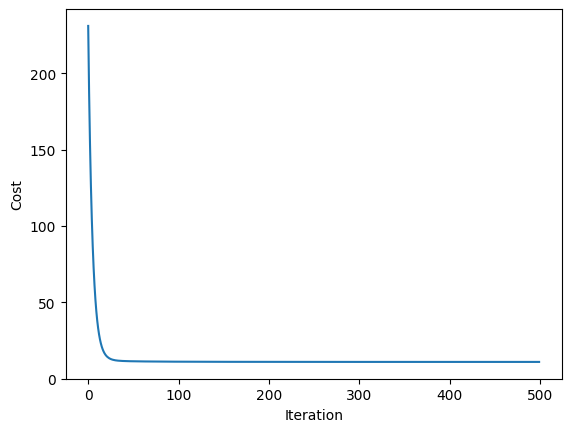

In [97]:
plt.plot(np.arange(len(J_hist)), J_hist)
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.show()

# Evaluating

We'll Evaluate the model on a testing dataset

In [98]:
def evaluate(x, y, w, b):
    y_pred = np.dot(x, w) + b

    y_mean = np.mean(y)
    sum_actual = np.sum((y - y_mean)**2)

    sum_pred = np.sum((y_test - y_pred)**2)

    score = 1 - (sum_pred / sum_actual)
    
    return score

print(evaluate(x_test, y_test, w, b))

0.6509531442156087


## Conclusion

Based on implementation of same data on sklearn in the other notebook, we can obtained a score of roughly 0.615 whereas our implementaion achieves 0.65 on unseen data thus our implementation is better.